# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [59]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [60]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&APPID={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinop
Processing Record 2 of Set 1 | cabitan
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | sydney mines
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | portland
Processing Record 8 of Set 1 | bonfim
Processing Record 9 of Set 1 | resistencia
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | andenes
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | kawalu
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | namie
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | ustye
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | avarua
Processin

In [61]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [62]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sinop,41.7711,34.8709,10.13,90,40,1.08,TR,1684449002
1,cabitan,12.2943,123.3412,28.32,74,96,2.41,PH,1684449003
2,jamestown,42.0970,-79.2353,20.85,28,0,2.57,US,1684448784
3,castro,-24.7911,-50.0119,11.73,74,0,0.87,BR,1684449005
4,sydney mines,46.2367,-60.2177,8.33,47,20,8.23,CA,1684449005


In [63]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [64]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinop,41.7711,34.8709,10.13,90,40,1.08,TR,1684449002
1,cabitan,12.2943,123.3412,28.32,74,96,2.41,PH,1684449003
2,jamestown,42.0970,-79.2353,20.85,28,0,2.57,US,1684448784
3,castro,-24.7911,-50.0119,11.73,74,0,0.87,BR,1684449005
4,sydney mines,46.2367,-60.2177,8.33,47,20,8.23,CA,1684449005


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

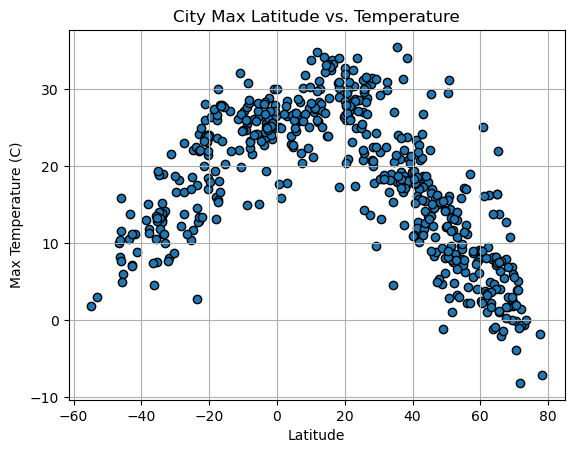

In [65]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

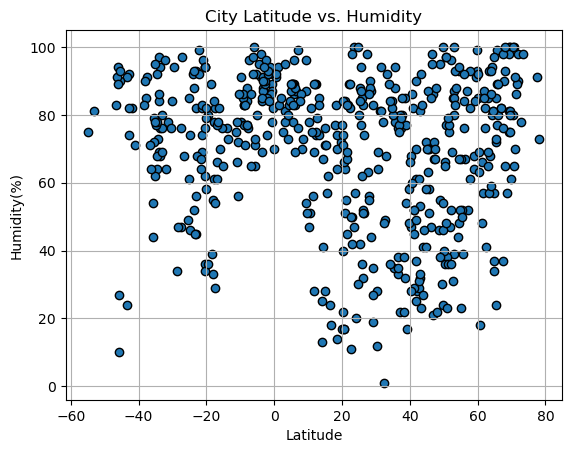

In [66]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

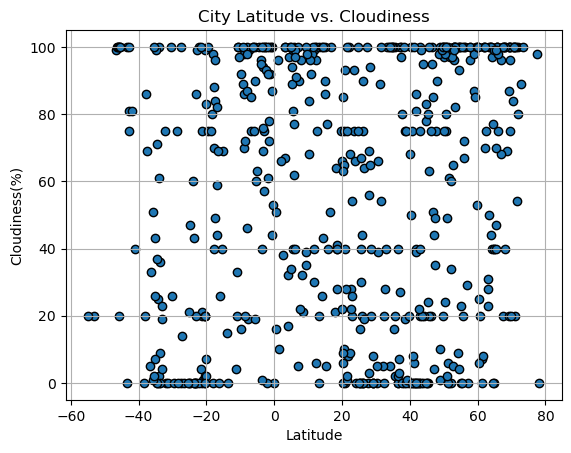

In [67]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

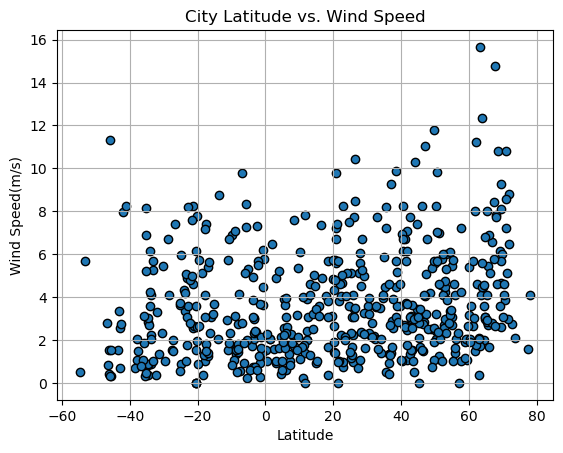

In [68]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [70]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinop,41.7711,34.8709,10.13,90,40,1.08,TR,1684449002
1,cabitan,12.2943,123.3412,28.32,74,96,2.41,PH,1684449003
2,jamestown,42.0970,-79.2353,20.85,28,0,2.57,US,1684448784
4,sydney mines,46.2367,-60.2177,8.33,47,20,8.23,CA,1684449005
6,portland,45.5234,-122.6762,29.34,51,20,3.13,US,1684448876


In [71]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,castro,-24.7911,-50.0119,11.73,74,0,0.87,BR,1684449005
5,busselton,-33.6500,115.3333,13.79,76,36,4.12,AU,1684449006
8,resistencia,-27.4606,-58.9839,23.03,76,0,1.54,AR,1684449008
9,cape town,-33.9258,18.4232,15.21,69,0,6.17,ZA,1684448770
10,puerto ayora,-0.7393,-90.3518,29.98,89,87,4.47,EC,1684448775


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8331174934154923


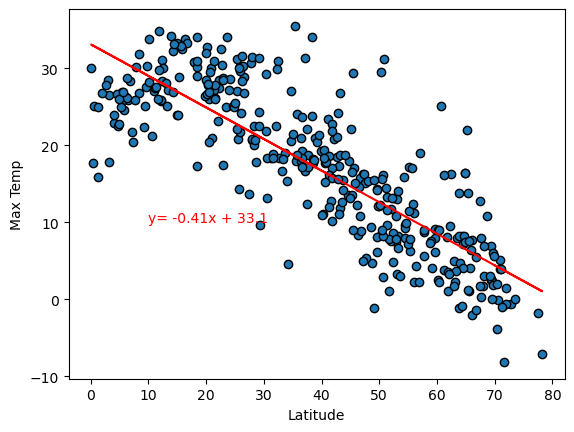

In [72]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], edgecolors='black')

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line, (10, 10), color='red')
r_values = x_values * slope + intercept
plt.plot(x_values, r_values, 'r-')
print(f'The r-value is: {rvalue}')
plt.show()


The r-value is: 0.8112955079614695


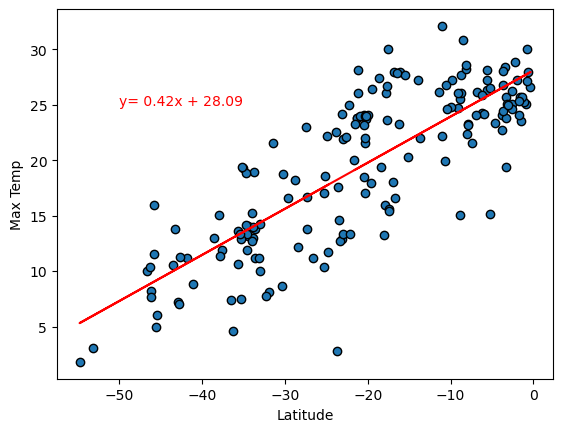

In [73]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], edgecolors='black')

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line, (-50, 25), color='red')
r_values = x_values * slope + intercept
plt.plot(x_values, r_values, 'r-')
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship: Based on the scatter plots we can see that the further away you move from the equator the lower the max temperature gets.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04957343672515909


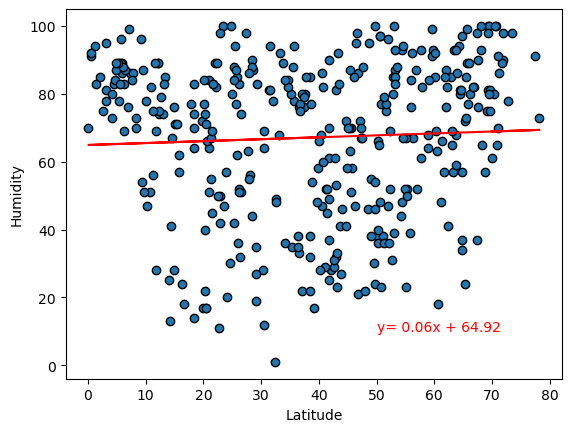

In [81]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolors='black')

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line, (50, 10), color='red')
r_values = x_values * slope + intercept
plt.plot(x_values, r_values, 'r-')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.21630146795998292


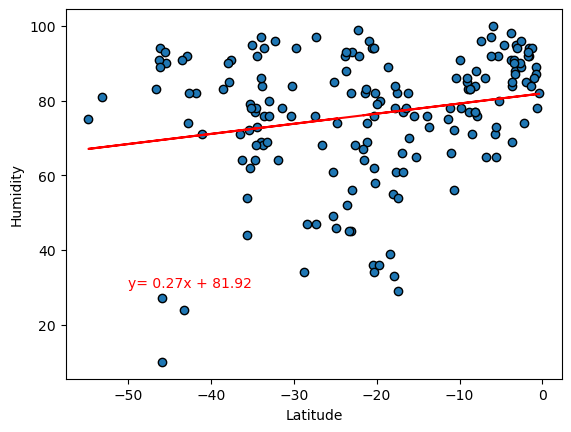

In [82]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolors='black')

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

line = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line, (-50,30), color='red')
r_values = x_values * slope + intercept
plt.plot(x_values, r_values, 'r-')
print(f'The r-value is: {rvalue}')
plt.show()

Based on the scatter plots, we can see that humidity slowly rises the higher the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12280652906827082


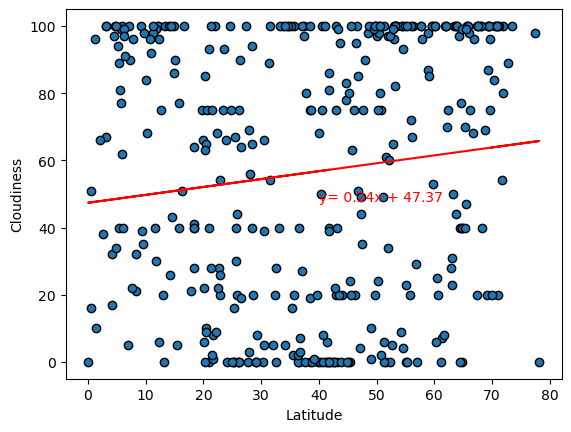

In [76]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], edgecolors='black')

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line, (40,48), color='red')
r_values = x_values * slope + intercept
plt.plot(x_values, r_values, 'r-')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.2606172966394363


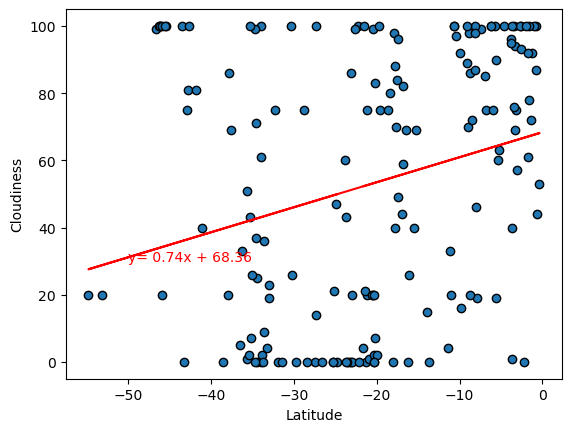

In [77]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], edgecolors='black')

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line, (-50, 30), color='red')
r_values = x_values * slope + intercept
plt.plot(x_values, r_values, 'r-')
print(f'The r-value is: {rvalue}')
plt.show()

Based on the plots, we can see that the level of cloudiness is on a constant rise the higher the latitude goes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2532847511258984


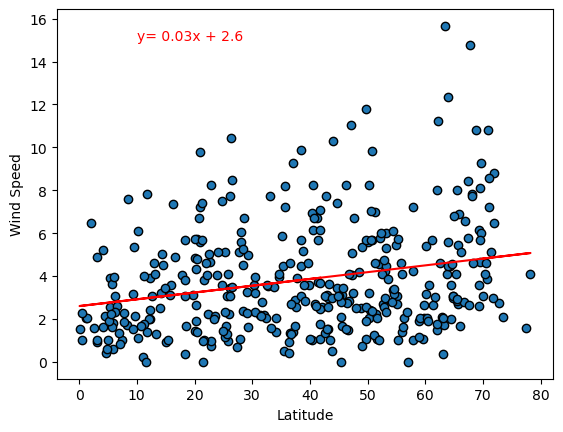

In [78]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], edgecolors='black')

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line, (10, 15), color='red')
r_values = x_values * slope + intercept
plt.plot(x_values, r_values, 'r-')
print(f'The r-value is: {rvalue}')
plt.show()

The r-value is: 0.04621879244115347


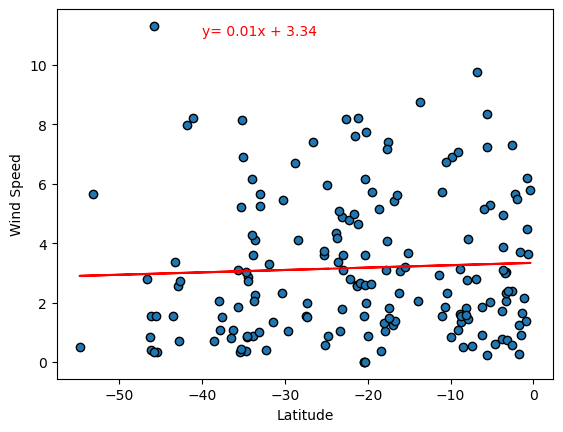

In [79]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], edgecolors='black')

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.annotate(line, (-40, 11), color='red')
r_values = x_values * slope + intercept
plt.plot(x_values, r_values, 'r-')
print(f'The r-value is: {rvalue}')
plt.show()

Based on the plots, we can see that below the equator the wind speed is pretty much equal. On the northern side of the equator there is a gradual increase in wind speed the further you go from the equator.